#Import Enviroment for Project

In [1]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import pandas as pd
pd.options.display.max_columns = 33

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

Importing new data set that has been cleaned from github

In [9]:
df1 = pd.read_csv('Steam_game.csv')

In [10]:
df1 = df1[(df1['Release date_year']>=2008)&(df1['Release date_year']<=2024)]

In [11]:
df1.to_csv("Steam_games_2008_2023.csv")

Double Check and continue to feature engineered

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68480 entries, 0 to 68674
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       68480 non-null  int64  
 1   Name                        68480 non-null  object 
 2   Release date                68480 non-null  object 
 3   Estimated owners            68480 non-null  object 
 4   Peak CCU                    68480 non-null  int64  
 5   Required age                68480 non-null  int64  
 6   Price                       68480 non-null  float64
 7   DLC count                   68480 non-null  int64  
 8   About the game              68480 non-null  object 
 9   Windows                     68480 non-null  bool   
 10  Mac                         68480 non-null  bool   
 11  Linux                       68480 non-null  bool   
 12  User score                  68480 non-null  int64  
 13  Positive                    68480 no

Summary df.info() :

* There are no null data
* total rows is 68552
* total columns is 26
* Release_date_day, Release_date_month, and Release_date_year does not have datetime dtype
* Another dtype looks fine mostly dominated with numerical dtype

In [12]:
df1.describe()

,AppID,Peak CCU,Required age,Price,DLC count,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Release_date_day,Release_date_month,Release date_year
count,6.848000e+04,68480.000000,68480.000000,68480.000000,68480.000000,68480.000000,6.848000e+04,68480.000000,68480.000000,6.848000e+04,68480.000000,68480.000000,68480.000000,68480.000000,68480.000000,68480.000000,68480.000000
mean,1.182620e+06,141.928811,0.345020,7.479894,0.638332,0.047094,1.102371e+03,185.141005,22.506075,8.940149e+02,121.176460,11.774007,109.810616,12.723846,15.989048,6.600219,2019.273233
std,5.882057e+05,5901.381738,2.366755,11.208730,15.274047,1.945651,2.662887e+04,5073.209408,189.846321,1.955815e+04,1252.311891,194.269201,1677.587379,213.523118,8.847610,3.482521,2.680972
min,3.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,6.941575e+05,0.000000,0.000000,0.990000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,2018.000000
50%,1.153855e+06,0.000000,0.000000,4.990000,0.000000,0.000000,1.000000e+01,3.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,16.000000,7.000000,2020.000000
75%,1.658628e+06,1.000000,0.000000,9.990000,0.000000,0.000000,6.200000e+01,19.000000,20.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,10.000000,2021.000000
max,2.367730e+06,872138.000000,21.000000,999.000000,2366.000000,100.000000,5.764420e+06,895978.000000,9821.000000,3.441592e+06,145727.000000,10996.000000,208473.000000,10996.000000,31.000000,12.000000,2023.000000


Summary for df1.describe() :

* all min value are in 0 and max is variety
* Positive feature has high mean, max, and std
* most feature have near 0 in 25% of the data, 50% of the data, and 75% of the data

Creating 2 new data set for only free and only paid games

In [ ]:
df1_free = df1.copy()
df1_paid = df1.copy()

df1_free = df1_free[df1_free['Price']==0]
df1_paid = df1_paid[df1_paid['Price']!=0]

#Preprocessing

Corellation

In [ ]:
df1['Windows'] = df1['Windows'].astype(int)
df1['Mac'] = df1['Mac'].astype(int)
df1['Linux'] = df1['Linux'].astype(int)

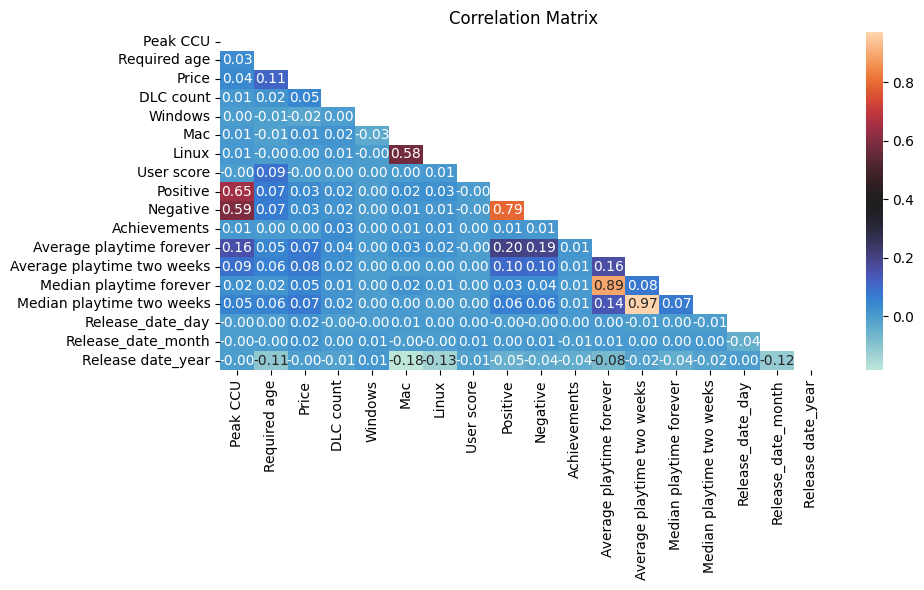

In [ ]:
df1_nums = df1.select_dtypes(include=['number'])
df_to_corr = df1_nums.drop(columns='AppID')

corr = df_to_corr.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Selecting Feature

In [13]:
df2 = df1[['Name','Release date','Price','Average playtime forever','Developers','Publishers','Genres','About the game']]

Estimate users Feature

There are no explicit explanation about the users so we found a way to estimate the users

we use there feature:
* Peak CCU (Peak CCU is estimate users that are log in at the same time)
* Positive (Total users that are clicking Positive feedback to the game)
* Negative (Total users that are clicking Negative feedback to the game)

In [14]:
df2["Estimate users"] = df1['Peak CCU']+df1['Positive']+df1['Negative']

Estimate Gross Profit

Because we use Estimate users that mean the Gross Profit is also Estimated

In [15]:
df2["Estimated gross profit"] = df2["Estimate users"]*df2["Price"]

Review Score Feature

Determine the quality of the game by their users feedback

In [16]:
df2['Review score'] = df1['Positive']-df1['Negative']

Total days Feature

Counting how many days that game has been release to find is it old game or new game

In [17]:
df1['Release_date_day'] = df1['Release_date_day'].astype(int)
df1['Release_date_month'] = df1['Release_date_month'].astype(int)
df1['Release date_year'] = df1['Release date_year'].astype(int)
df1['date_str'] = df1['Release_date_day'].astype(str) + '-' + df1['Release_date_month'].astype(str) + '-' + df1['Release date_year'].astype(str)
df1["Release_date"] = pd.to_datetime(df1['date_str'], format='%d-%m-%Y')

In [18]:
df2['Total days'] = (df1["Release_date"].max()-df1["Release_date"]).dt.days

Extras and Trophy

Extras and Trophy is a feature for how many extra activity that the game provide

In [19]:
df2['Extras trophy'] = df1['DLC count']+df1['Achievements']

Operating system feature

We realize there are 3 type of OS (operating system) in the feature so we choose to combine it

even though we can't identify the OS but at lease we knew that the game can be played in some or all OS

In [20]:
df2['Operating System'] = df1['Windows']+df1['Mac']+df1['Linux']

Genres Filtering

In [ ]:
genres = df1['Genres'].unique() #checking every value in genres
genres_table = pd.DataFrame(genres)
genres_table.head(1000)

,0
0,"Casual,Indie,Sports"
1,"Action,Indie"
2,"Action,Adventure,Indie,Strategy"
3,"Adventure,Casual,Indie"
4,"Adventure,Indie"
...,...
995,"Adventure,Simulation,Utilities"
996,"Adventure,Free to Play,Indie,RPG,Simulation,St..."
997,"Animation & Modeling,Design & Illustration,Pho..."
998,"Animation & Modeling,Audio Production,Design &..."


In [ ]:
df2['Action'] = np.where(df2['Genres'].str.contains('Action') == True, 1, 0)
df2['Casual'] = np.where(df2['Genres'].str.contains('Casual') == True, 1, 0)
df2['Adventure'] = np.where(df2['Genres'].str.contains('Adventure') == True, 1, 0)
df2['Indie'] = np.where(df2['Genres'].str.contains('Indie') == True, 1, 0)
df2['Sports'] = np.where(df2['Genres'].str.contains('Sports') == True, 1, 0)
df2['Strategy'] = np.where(df2['Genres'].str.contains('Strategy') == True, 1, 0)
df2['Simulation'] = np.where(df2['Genres'].str.contains('Simulation') == True, 1, 0)
df2['Animation'] = np.where(df2['Genres'].str.contains('Animation') == True, 1, 0)
df2['Design & Illustration'] = np.where(df2['Genres'].str.contains('Design & Illustration') == True, 1, 0)
df2['Education'] = np.where(df2['Genres'].str.contains('Education') == True, 1, 0)
df2['Free to Play'] = np.where(df2['Genres'].str.contains('Free to Play') == True, 1, 0)
df2['Early Access'] = np.where(df2['Genres'].str.contains('Early Access') == True, 1, 0)
df2['Racing'] = np.where(df2['Genres'].str.contains('Racing') == True, 1, 0)
df2['RPG'] = np.where(df2['Genres'].str.contains('RPG') == True, 1, 0)
df2['Massively Multiplayer'] = np.where(df2['Genres'].str.contains('Massively Multiplayer') == True, 1, 0)
df2['Utilities'] = np.where(df2['Genres'].str.contains('Utilities') == True, 1, 0)
df2['Sexual Content'] = np.where(df2['Genres'].str.contains('Sexual Content') == True, 1, 0)
df2['Nudity'] = np.where(df2['Genres'].str.contains('Nudity') == True, 1, 0)
df2['Violent'] = np.where(df2['Genres'].str.contains('Violent') == True, 1, 0)
df2['Gore'] = np.where(df2['Genres'].str.contains('Gore') == True, 1, 0)
df2['Animation & Modeling'] = np.where(df2['Genres'].str.contains('Animation & Modeling') == True, 1, 0)
df2['Game Development'] = np.where(df2['Genres'].str.contains('Game Development') == True, 1, 0)
df2['Web Publishing'] = np.where(df2['Genres'].str.contains('Web Publishing') == True, 1, 0)
df2['Photo Editing'] = np.where(df2['Genres'].str.contains('Photo Editing') == True, 1, 0)
df2['Audio Production'] = np.where(df2['Genres'].str.contains('Audio Production') == True, 1, 0)
df2['Video Production'] = np.where(df2['Genres'].str.contains('Video Production') == True, 1, 0)
df2['Software Training'] = np.where(df2['Genres'].str.contains('Software Training') == True, 1, 0)

Creating new data set for checking Genres

In [ ]:
data = ['Action',
        'Casual',
        'Adventure',
        'Indie',
        'Sports',
        'Strategy',
        'Simulation',
        'Animation',
        'Design & Illustration',
        'Education',
        'Free to Play',
        'Early Access',
        'Racing',
        'RPG',
        'Massively Multiplayer',
        'Utilities',
        'Sexual Content',
        'Nudity',
        'Violent',
        'Gore',
        'Animation & Modeling',
        'Game Development',
        'Web Publishing',
        'Photo Editing',
        'Audio Production',
        'Video Production',
        'Software Training']
genres_data = pd.DataFrame(data=data,columns=['Genres'])
genres_data.to_csv("genres.csv",index=False) #creating data set for streamlit

Dataframe result for EDA

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68480 entries, 0 to 68674
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      68480 non-null  object 
 1   Release date              68480 non-null  object 
 2   Price                     68480 non-null  float64
 3   Average playtime forever  68480 non-null  int64  
 4   Developers                68480 non-null  object 
 5   Publishers                68480 non-null  object 
 6   Genres                    68480 non-null  object 
 7   About the game            68480 non-null  object 
 8   Estimate users            68480 non-null  int64  
 9   Estimated gross profit    68480 non-null  float64
 10  Review score              68480 non-null  int64  
 11  Total days                68480 non-null  int64  
 12  Extras trophy             68480 non-null  int64  
 13  Operating System          68480 non-null  bool   
dtypes: bool(1),

DataFrame result after preprocessing for modeling

In [ ]:
df3_ = df2.drop(columns=['Name','Release date','Developers','Publishers'])
df3_.info()

In [ ]:
df3_['Operating System'] = df3_['Operating System'].astype('int')

In [ ]:
df3_.info()

In [ ]:
df3_.head()

#Content Base Experiment

In [34]:
#you can try sampling for easy metric pairwise
df = pd.read_csv("Steam_games_feature.csv").sample(10000,random_state=42).reset_index()

In [38]:
#or you can use filtering by year
df['Release date'] = pd.to_datetime(df['Release date'])
df['year'] = df['Release date'].dt.year
df['year'] = df['year'].astype(int)
df_2008 = df[df['year']==2008]
df_2009 = df[df['year']==2009]
df_2010 = df[df['year']==2010]
df_2011 = df[df['year']==2011]
df_2012 = df[df['year']==2012]
df_2013 = df[df['year']==2013]
df_2014 = df[df['year']==2014]
df_2015 = df[df['year']==2015]
df_2016 = df[df['year']==2016]
df_2017 = df[df['year']==2017]
df_2018 = df[df['year']==2018]
df_2019 = df[df['year']==2019]
df_2020 = df[df['year']==2020]
df_2021 = df[df['year']==2021]
df_2022 = df[df['year']==2022]
df_2023 = df[df['year']==2023]


In [39]:
df_2008.to_csv("Steam_games_2008.csv",index=False)
df_2009.to_csv("Steam_games_2009.csv",index=False)
df_2010.to_csv("Steam_games_2010.csv",index=False)
df_2011.to_csv("Steam_games_2011.csv",index=False)
df_2012.to_csv("Steam_games_2012.csv",index=False)
df_2013.to_csv("Steam_games_2013.csv",index=False)
df_2014.to_csv("Steam_games_2014.csv",index=False)
df_2015.to_csv("Steam_games_2015.csv",index=False)
df_2016.to_csv("Steam_games_2016.csv",index=False)
df_2017.to_csv("Steam_games_2017.csv",index=False)
df_2018.to_csv("Steam_games_2018.csv",index=False)
df_2019.to_csv("Steam_games_2019.csv",index=False)
df_2020.to_csv("Steam_games_2020.csv",index=False)
df_2021.to_csv("Steam_games_2021.csv",index=False)
df_2022.to_csv("Steam_games_2022.csv",index=False)
df_2023.to_csv("Steam_games_2023.csv",index=False)

In [15]:
df.head(1)

,index,Name,Release date,Price,Average playtime forever,Developers,Publishers,Genres,About the game,Estimate users,Estimated gross profit,Review score,Total days,Extras trophy,Operating System,Content
0,43418,Summer: Jigsaw Puzzles,2018-07-17,3.99,0,Myarcadegames Studios,Myarcadegames Studios,"Adventure,Casual,Indie,Simulation,Sports,Strategy",Summer: Jigsaw Puzzles. It‘s a clever and colo...,1,3.99,-1,1993,0,True,"Adventure,Casual,Indie,Simulation,Sports,Strat..."


Use the game **Name** above when you want to predict similarity

In [28]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi vektor fitur
from sklearn.feature_extraction.text import TfidfVectorizer

df["Content"] = df['Genres']+" "+df['About the game']

# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 3,
                        stop_words='english',
                        max_features=None,
                        strip_accents='unicode',
                        analyzer='word',
                        token_pattern=r'\w{1,}',
                        ngram_range=(1,3))

#fill na with empty string
df["Content"] = df["Content"].fillna(" ")

# Fit dan transformasi data
tfidf_matrix = tfidf.fit_transform(df['Content'])

print(tfidf_matrix.shape)  # (4, jumlah fitur)


(10000, 74227)


In [29]:
tfidf_matrix

<10000x74227 sparse matrix of type '<class 'numpy.float64'>'
	with 1261541 stored elements in Compressed Sparse Row format>

if using cosine

In [ ]:
#JIKA SUDAH MENGGUNAKAN SIGMOID MAKA LAKUKAN DI NOTEBOOK YANG KHUSUS SIGMOIN

from sklearn.metrics.pairwise import cosine_similarity

# Menghitung kesamaan kosinus antara semua film
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#JIKA SUDAH MENGGUNAKAN SIGMOID MAKA LAKUKAN DI NOTEBOOK YANG KHUSUS SIGMOIN

# Fungsi untuk mendapatkan rekomendasi
def get_recommendations(title, cosine_sim=cosine_sim):
    # Mendapatkan indeks dari judul film yang diberikan
    idx = df2.index[df['Name'] == title][0]

    # Mendapatkan skor kesamaan pasangan semua film dengan film yang diberikan
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan film berdasarkan skor kesamaan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mendapatkan indeks film yang paling mirip
    sim_scores = sim_scores[1:4]  # Mengambil 3 film teratas (kecuali film itu sendiri)

    # Mengambil judul film dari indeks yang didapatkan
    movie_indices = [i[0] for i in sim_scores]

    # Mengembalikan film yang direkomendasikan
    return df2['Name'].iloc[movie_indices]

# Mendapatkan rekomendasi untuk 'Movie1'
print(get_recommendations('FIFA 22'))


if using Sigmoid

In [30]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfidf_matrix, tfidf_matrix)

In [36]:
indices = pd.Series(df.index, index=df["Name"])

In [37]:
indices

Name
Summer: Jigsaw Puzzles                0
AVA                                   1
War Trigger 2                         2
Escape First 2                        3
My Universe - Interior Designer       4
                                   ... 
Green Diver                        9995
BLASTRONAUT                        9996
Furry Shades of Gay                9997
Square Weapons Dungeon             9998
3 on 3 Super Robot Hockey          9999
Length: 10000, dtype: int64

In [22]:
def give_reco(title, sig=sig):
  idx = indices[title]
  sig_score=list(enumerate(sig[idx]))
  sig_score=sorted(sig_score, key=lambda x: x[1], reverse=True)
  sig_score=sig_score[1:11]
  games_indices = [i[0] for i in sig_score]
  return df['Name'].iloc[games_indices]



In [24]:
give_reco('War Trigger 2')

254                    KOEWOTAYORINI / 声之寄托
242                                     KEO
961             GUNWATCH: Conflict Survival
211                               BLACK ACE
530                                  Bezirk
141                     Blasted Road Terror
489                       荒土之上 On Wasteland
103    TrackMaster: Free-For-All Motorsport
471                                      牌师
61      Freddy Fazbear's Pizzeria Simulator
Name: Name, dtype: object